In [1]:
import urllib
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline    

In [3]:
from PIL import Image
import numpy

In [4]:
url='https://news.naver.com'
pages=urllib.request.urlopen(url)
bs=BeautifulSoup(pages,'html.parser')

In [5]:
results=bs.select('.section_list_ranking li a')

In [7]:
output=''
for result in results:
    url_content='https://news.naver.com'+result.attrs['href']
    response_content = urllib.request.urlopen(url_content)
    soup_content=BeautifulSoup(response_content,'html.parser')
    content=soup_content.select_one('#articleBodyContents')
    
    for item in content.contents:
        stripped = str(item).strip()    
        if stripped=='':
            continue
        if stripped[0] not in['<','/']: 
            output+=str(item).strip()

In [8]:
def displayWordCloud(data, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = './NanumPen.ttf',
                        # stopwords = stopwords_kr,    # 제외시키고 싶은 단어 (리스트로 미리 만들어두기)
                        background_color = backgroundcolor,
                        width = width, height = height).generate(output)
    print(wordcloud.words_)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

{'있다': 1.0, '기자': 0.6153846153846154, '했다': 0.5673076923076923, '말했다': 0.3942307692307692, '없다': 0.3557692307692308, '한다': 0.3557692307692308, 'co kr': 0.3269230769230769, '조씨는': 0.3173076923076923, '대해': 0.3173076923076923, '있는': 0.2980769230769231, '밝혔다': 0.27884615384615385, '것으로': 0.2692307692307692, '4일': 0.25961538461538464, '대한': 0.25961538461538464, '3일': 0.25, '그는': 0.25, '가장': 0.25, '지난': 0.2403846153846154, '하지만': 0.2403846153846154, '것이': 0.22115384615384615, '이날': 0.22115384615384615, '이후': 0.22115384615384615, '미국': 0.22115384615384615, '위해': 0.20192307692307693, '된다': 0.20192307692307693, '것은': 0.20192307692307693, '것이다': 0.20192307692307693, '이런': 0.20192307692307693, '따르면': 0.20192307692307693, '이어': 0.19230769230769232, '것을': 0.19230769230769232, '지난해': 0.19230769230769232, '하는': 0.18269230769230768, '지난달': 0.17307692307692307, '이라고': 0.17307692307692307, '있었다': 0.17307692307692307, '재배포 금지본문': 0.17307692307692307, '의원은': 0.16346153846153846, '경우': 0.16346153846153846

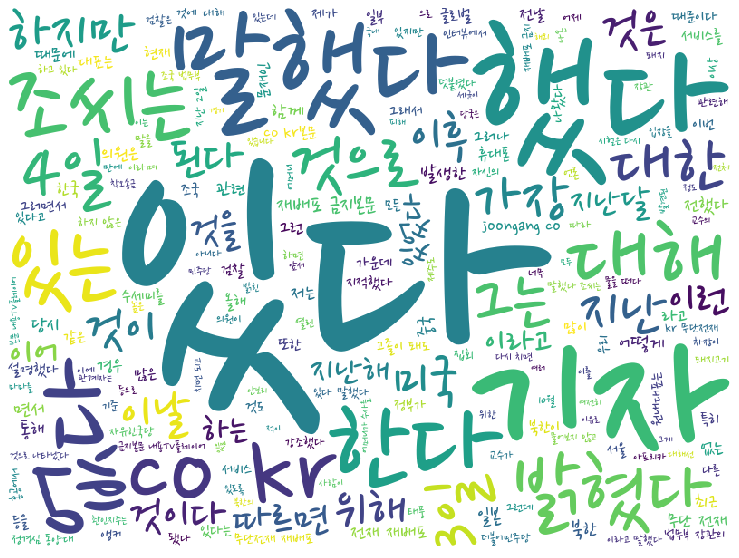

Wall time: 937 ms


In [9]:
%time displayWordCloud(output)